In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs ## generate dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
X , y_true = make_blobs(n_samples = 500 , centers = 3 , cluster_std = 0.60 , random_state = 42)

In [4]:
X


array([[-6.1900632 , -7.30201545],
       [ 3.02174685,  1.94059276],
       [ 5.9537606 ,  1.48819071],
       [-2.74446251,  8.13617716],
       [ 5.36060719,  1.72832446],
       [ 5.13808033,  1.45951939],
       [-5.34357647, -6.93774553],
       [ 4.80215293,  1.94302682],
       [ 3.99930658,  1.88774199],
       [-7.25451834, -6.86445496],
       [ 4.25193511,  1.32424088],
       [-1.81404028,  8.52187674],
       [-1.2293776 ,  7.84303345],
       [-2.16666332,  9.69562551],
       [ 4.81374375,  3.21841016],
       [ 5.27493353,  0.91792599],
       [-2.5524037 ,  9.61640587],
       [-7.5532604 , -6.65066375],
       [-6.8302568 , -6.24082137],
       [-3.17299861,  8.29656215],
       [ 3.80073829,  2.31095123],
       [-2.38387947,  7.83848405],
       [ 4.98581301,  2.15991978],
       [-5.94031277, -6.91955975],
       [-7.14748736, -6.7636556 ],
       [ 4.87655012,  1.720579  ],
       [ 4.48689251,  2.87556548],
       [-6.4081471 , -6.62483506],
       [-6.71939703,

In [5]:
df = pd.DataFrame( X , columns = ['feature_1' , 'feature_2'])

In [6]:
df

,feature_1,feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [7]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [8]:
inertia = [] ## wcss
K_range = range(1,11)

In [9]:
for k in K_range:
    kmeans = KMeans(n_clusters = k , random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [10]:
inertia

[1000.0000000000002,
 297.8954141051722,
 11.575484723104982,
 9.752067977356841,
 8.25717527244628,
 6.9175773204168,
 6.334755391595289,
 5.704177177901431,
 5.060234133532077,
 4.762361898130397]

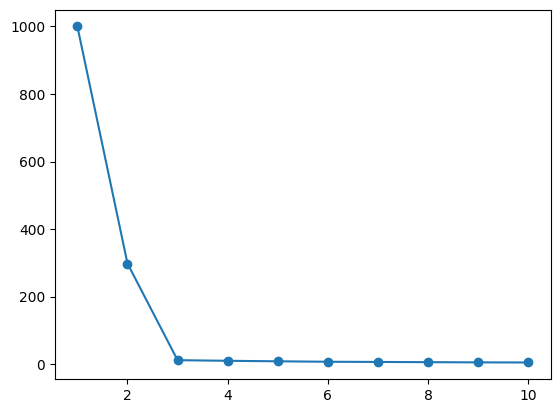

In [11]:
plt.plot(K_range , inertia , marker ='o')

In [12]:
k_mean_final = KMeans(n_clusters = 3 , random_state=42)

In [13]:
cluster_labels = k_mean_final.fit_predict(X_scaled)

In [16]:
df['cluster'] =cluster_labels

<Axes: xlabel='feature_1', ylabel='feature_2'>

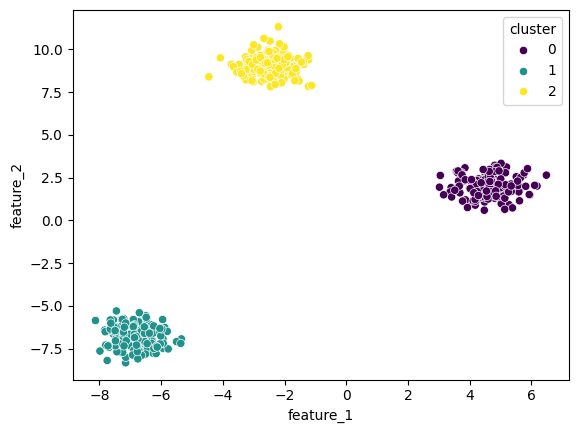

In [17]:
sns.scatterplot(x = df['feature_1'],
                y = df['feature_2'],
                hue = df['cluster'],
                palette='viridis')